# QuTiP lecture: Jaynes-Cummings-like model in the ultrastrong coupling regime

Author: J. R. Johansson (robert@riken.jp), http://dml.riken.jp/~rob/

The latest version of this [IPython notebook](http://ipython.org/ipython-doc/dev/interactive/htmlnotebook.html) lecture is available at [http://github.com/jrjohansson/qutip-lectures](http://github.com/jrjohansson/qutip-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.com](http://jrjohansson.github.com).

In [1]:
# setup the matplotlib graphics library and configure it to show figures inline in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

In [2]:
# make qutip available in the rest of the notebook
from qutip import *

parameter

In [9]:
wc = 0.5  * 2 * np.pi  # cavity frequency
wa = 0.5  * 2 * np.pi  # atom frequency
g  = 2.0 * 2 * np.pi # coupling strength vector

N = 5            # number of cavity fock states
use_rwa = False

### Setup the operators and the Hamiltonian

In [17]:
# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

na = sm.dag() * sm  # atom
nc = a.dag() * a    # cavity

# decoupled Hamiltonian
H0 = wc * a.dag() * a + wa * sm.dag() * sm

# interaction Hamiltonian
if use_rwa:
    H1 = (a.dag() * sm + a * sm.dag())
else:
    H1 = (a.dag() + a) * (sm + sm.dag())

# Find ground state and excited states

psi_list = []
ene_list = []
H = H0 + g * H1
gnd_energy, gnd_state = H.groundstate()
full_energy, full_eigenstate = H.eigenstates()
ex_state = full_eigenstate[1]
    
# store the ground state
# psi_list.append(gnd_state)

psi_list.append(gnd_state)

ene_list.append(full_energy)
full_energy[0]

-26.392901368078594

## Find ground state as a function of coupling strength

Calculate the cavity and atom excitation probabilities as for the calculated ground states:

In [17]:
na_expt = expect(na, psi_list) # qubit  occupation probability dynamics
nc_expt = expect(nc, psi_list) # cavity occupation probability dynamics

In [18]:
na_expt

array([0.49202225])

Plot the ground state occupation probabilities of the cavity and the atom as a function of coupling strenght. Note that for large coupling strength (the ultrastrong coupling regime, where $g > \omega_a,\omega_c$), the ground state has both photonic and atomic excitations.

NameError: name 'g_vec' is not defined

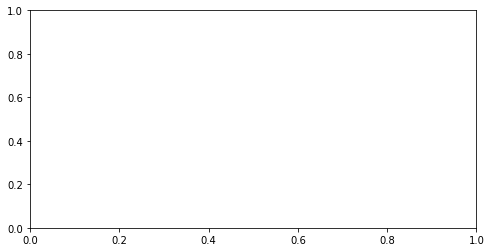

In [19]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(g_vec/(2*np.pi), nc_expt, 'r', linewidth=2, label="cavity")
axes.plot(g_vec/(2*np.pi), na_expt, 'b', linewidth=2, label="atom")
axes.set_ylabel("Occupation probability", fontsize=16)
axes.set_xlabel("coupling strenght", fontsize=16)
axes.legend(loc=0)

fig.tight_layout()

# Plot the wigner functions of the cavity as a function of coupling strength

In [ ]:
g_idx = np.where([g_vec == 2*np.pi*g for g in [0.0, 0.5, 1.0, 1.5, 2.0]])[1]
psi_sublist = np.array(psi_list)[g_idx]

xvec = np.linspace(-7,7,200)

fig_grid = (2, len(psi_sublist)*2)
fig = plt.figure(figsize=(3*len(psi_sublist),6))

for idx, psi in enumerate(psi_sublist):
    rho_cavity = ptrace(psi, 0)
    W = wigner(rho_cavity, xvec, xvec)
    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.125,.125), cmap=plt.get_cmap('RdBu'))
    ax.set_title(r"$g = %.1f$" % (g_vec[g_idx][idx]/(2*np.pi)), fontsize=16)

# plot the cavity occupation probability in the ground state
ax = plt.subplot2grid(fig_grid, (1, 1), colspan=(fig_grid[1]-2))
ax.plot(g_vec/(2*np.pi), nc_expt, label="Cavity")
ax.plot(g_vec/(2*np.pi), na_expt, label="Atom excited state")
ax.legend(loc=0)
ax.set_xlabel('coupling strength')
ax.set_ylabel('Occupation probability')

In [ ]:
rho_atom = ptrace(psi, 1)
rho_atom

## Entropy of atom/cavity as a measure of entanglement

In [ ]:
entropy_cavity = np.zeros(shape(g_vec))
entropy_atom   = np.zeros(shape(g_vec))

for idx, psi in enumerate(psi_list):
    
    rho_cavity = ptrace(psi, 0)
    entropy_cavity[idx] = entropy_vn(rho_cavity, 2)

    rho_atom = ptrace(psi, 1)
    entropy_atom[idx]   = entropy_vn(rho_atom, 2)

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(g_vec/(2*np.pi), entropy_cavity, 'b', label="cavity", linewidth=2)
axes.plot(g_vec/(2*np.pi), entropy_atom, 'r--', label="atom", linewidth=2)
axes.set_ylim(0,1)
axes.set_ylabel("entropy", fontsize=16)
axes.set_xlabel("coupling strength", fontsize=16)
axes.legend(loc=0)

## Dynamics of an initially excited cavity

In [ ]:
H = H0 + 1.0 * 2 * np.pi * H1

psi0 = tensor(basis(N,1), basis(2,0))

In [ ]:
tlist = np.linspace(0, 20, 1000)
output = mesolve(H, psi0, tlist, [], [a.dag() * a, sm.dag() * sm])

In [ ]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))

axes.plot(tlist, np.real(output.expect[0]), 'r', linewidth=2, label="cavity")
axes.plot(tlist, np.real(output.expect[1]), 'b', linewidth=2, label="atom")
axes.legend(loc=0)

fig.tight_layout()

### Fock-state distribution and Wigner function for the cavity as a function of time

In [ ]:
tlist = np.linspace(0, 0.35, 8)
output = mesolve(H, psi0, tlist, [], [])

In [ ]:
rho_ss_sublist = output.states #[::4]

xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(2, len(rho_ss_sublist), figsize=(2*len(rho_ss_sublist), 4))

for idx, rho_ss in enumerate(rho_ss_sublist):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    axes[0,idx].contourf(xvec, xvec, W, 100, norm=mpl.colors.Normalize(-.25,.25), 
                         cmap=plt.get_cmap('RdBu'))

    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, N)

### Same thing with a little bit of dissipation

In [ ]:
kappa = 0.25

In [ ]:
tlist = np.linspace(0, 20, 1000)
output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [a.dag() * a, sm.dag() * sm])

In [ ]:
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,4))
axes.plot(tlist, output.expect[0], 'r', linewidth=2, label="cavity")
axes.plot(tlist, output.expect[1], 'b', linewidth=2, label="atom")
axes.legend(loc=0)

In [ ]:
tlist = np.linspace(0, 10, 8)
output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [])

In [ ]:
xvec = np.linspace(-5,5,200)

fig, axes = plt.subplots(2, len(output.states), figsize=(2*len(output.states), 4))

for idx, rho_ss in enumerate(output.states):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    axes[0,idx].contourf(xvec, xvec, W, 100, 
                         norm=mpl.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))

    # plot its fock-state distribution
    axes[1,idx].bar(np.arange(0, N), np.real(rho_ss_cavity.diag()), color="blue", alpha=0.6)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, N)

### Entropy as a function of time in presence of dissipation and starting in the ideal ground state

In [ ]:
tlist = np.linspace(0, 30, 50)

psi0 = H.groundstate()[1]

output = mesolve(H, psi0, tlist, [np.sqrt(kappa) * a], [])

In [ ]:
entropy_tot    = np.zeros(shape(tlist))
entropy_cavity = np.zeros(shape(tlist))
entropy_atom   = np.zeros(shape(tlist))

for idx, rho in enumerate(output.states):
    
    entropy_tot[idx] = entropy_vn(rho, 2)    
    
    rho_cavity = ptrace(rho, 0)
    entropy_cavity[idx] = entropy_vn(rho_cavity, 2)

    rho_atom = ptrace(rho, 1)
    entropy_atom[idx]   = entropy_vn(rho_atom, 2)

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))
axes.plot(tlist, entropy_tot, 'k', label="total", linewidth=2)
axes.plot(tlist, entropy_cavity, 'b', label="cavity", linewidth=2)
axes.plot(tlist, entropy_atom, 'r--', label="atom", linewidth=2)
axes.set_ylabel("entropy", fontsize=16)
axes.set_xlabel("coupling strength", fontsize=16)
axes.set_ylim(0, 1.5)
axes.legend(loc=0)

### Software versions

In [ ]:
from qutip.ipynbtools import version_table

version_table()